# Pymaceuticals Inc.
---
### Analysis

The number of unique mice is: 249
Unique Mouse IDs with duplicates: g989
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
#print(combined_data.head())

display(combined_data.head())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(f'The number of unique mice is: {num_mice}')


The number of unique mice is: 249


In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

print(f'Duplicate mice by Mouse ID and Timepoint:')
display(duplicate_mice)
print(f'Unique Mouse IDs with duplicates: {", ".join(duplicate_mouse_ids)}')


Duplicate mice by Mouse ID and Timepoint:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


Unique Mouse IDs with duplicates: g989


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = pd.DataFrame()

for mouse_id in duplicate_mouse_ids:
    mouse_data = combined_data[combined_data['Mouse ID'] == mouse_id]
    duplicate_mice_data = pd.concat([duplicate_mice_data, mouse_data], ignore_index=True)
    
print("Data for Duplicate Mice:")
display(duplicate_mice_data)


Data for Duplicate Mice:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,g989,Propriva,Female,21,26,0,45.000000,0
1,g989,Propriva,Female,21,26,0,45.000000,0
2,g989,Propriva,Female,21,26,5,48.786801,0
3,g989,Propriva,Female,21,26,5,47.570392,0
4,g989,Propriva,Female,21,26,10,51.745156,0
5,g989,Propriva,Female,21,26,10,49.880528,0
6,g989,Propriva,Female,21,26,15,51.325852,1
7,g989,Propriva,Female,21,26,15,53.442020,0
8,g989,Propriva,Female,21,26,20,55.326122,1
9,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset='Mouse ID', keep='first')

print("Cleaned Data:")
display(cleaned_data)

Cleaned Data:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [27]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(f'The number of unique mice in the cleaned DataFrame is: {num_mice_cleaned}')

The number of unique mice in the cleaned DataFrame is: 249


## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped = cleaned_data.groupby('Drug Regimen')
summary_stats = grouped['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'sem': 'SEM'
})

# Assemble the resulting series into a single summary DataFrame.
print("Summary Statistics of Tumor Volume for Each Regimen:")
display(summary_stats)


Summary Statistics of Tumor Volume for Each Regimen:


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

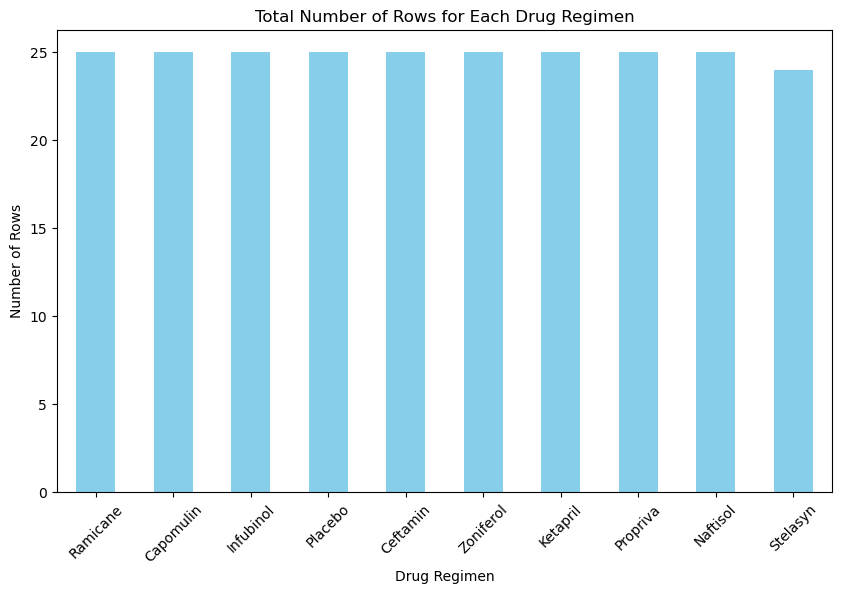

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)

plt.show()




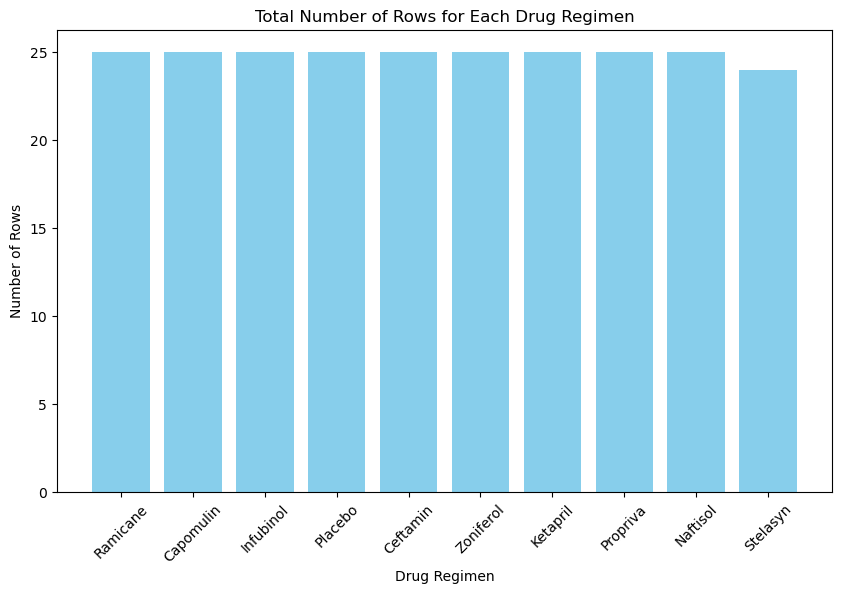

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Extract the regimen names and counts
regimen_names = regimen_counts.index
row_counts = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, row_counts, color='skyblue')

# Add labels and title
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)

plt.show()


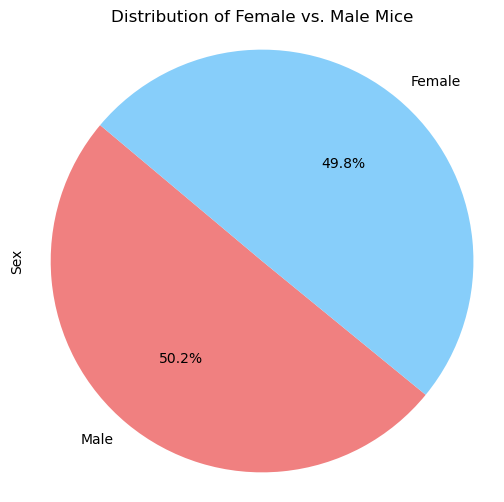

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by "Sex" and count the number of mice
sex_counts = cleaned_data['Sex'].value_counts()

# Create a pie plot using Pandas
colors = ['lightcoral', 'lightskyblue']
sex_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=140, figsize=(6, 6))

plt.title("Distribution of Female vs. Male Mice")

plt.axis('equal')
plt.show()


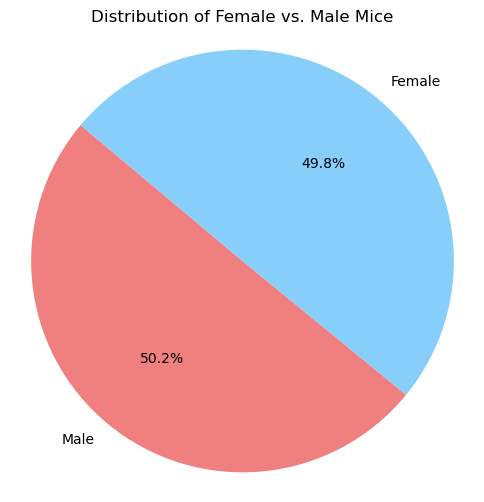

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group the data by "Sex" and count the number of mice
sex_counts = cleaned_data['Sex'].value_counts()


# Create a pie plot using pyplot
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Female vs. Male Mice")
plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# List of the four treatment regimens
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Create a DataFrame with the last timepoints
last_timepoint_data = cleaned_data[cleaned_data['Mouse ID'].isin(last_timepoints['Mouse ID'])]

# Merge this new DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoints, last_timepoint_data, on=['Mouse ID', 'Timepoint'], how='inner')

print("Final Tumor Volume for Each Mouse in Selected Regimens:")
print(final_tumor_volume_data)


Final Tumor Volume for Each Mouse in Selected Regimens:
    Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203          0    Infubinol  Female          20          23   
1       a251          0    Infubinol  Female          21          25   
2       a262          0      Placebo  Female          17          29   
3       a275          0     Ceftamin  Female          20          28   
4       a366          0     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
244     z435          0     Propriva  Female          12          26   
245     z578          0     Ramicane    Male          11          16   
246     z581          0    Infubinol  Female          24          25   
247     z795          0     Naftisol  Female          13          29   
248     z969          0     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0                  45.0            

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [35]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
    
    # List of the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data for plotting
tumor_volume_data = []

# For each treatment regimen:
for treatment in treatments:
    # Locate the rows which contain mice on that drug regimen and get their tumor volumes
    tumor_volumes = final_tumor_volume_data.loc[final_tumor_volume_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the tumor volume data to the list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the IQR (Interquartile Range)
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine potential outliers using upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {potential_outliers}")

# Display the list of tumor volume data for plotting
print("Tumor Volume Data for Plotting:")
print(tumor_volume_data)

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Tumor Volume Data for Plotting:
[19     45.0
24     45.0
61     45.0
64     45.0
66     45.0
81     45.0
84     45.0
86     45.0
88     45.0
109    45.0
116    45.0
122    45.0
125    45.0
163    45.0
164    45.0
170    45.0
175    45.0
181    45.0
184    45.0
193    45.0
205    45.0
209    45.0
221    45.0
227    45.0
240    45.0
Name: Tumor Volume (mm3), dtype: float64, 6      45.0
7      45.0
10     45.0
12     45.0
33     45.0
37     45.0
45     45.0
52     45.0
70     45.0
77     45.0
78     45.0
92     45.0
94     45.0
97     45.0
120    45.0
127    45.0
158    45.0
159    45.0
167    45.0
169    45.0
178    45.0
191    45.0
218    45.0
236

In [36]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


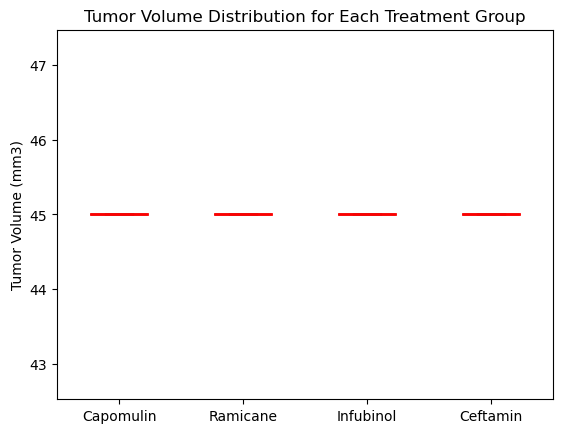

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a figure and axis for the box plot
fig, ax = plt.subplots()

# Customize the colors and labels for the box plot
boxprops = dict(linestyle='-', linewidth=1, color='black')
medianprops = dict(linestyle='-', linewidth=2, color='red')
flierprops = dict(marker='o', markerfacecolor='blue', markersize=8, markeredgecolor='black')

# Create a box plot for the tumor volume data of the four treatment groups
ax.boxplot(tumor_volume_data, labels=treatments, boxprops=boxprops, medianprops=medianprops, flierprops=flierprops)

# Set the y-axis label
ax.set_ylabel("Tumor Volume (mm3)")

# Set the title for the box plot
ax.set_title("Tumor Volume Distribution for Each Treatment Group")

# Show the box plot
plt.show()




In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

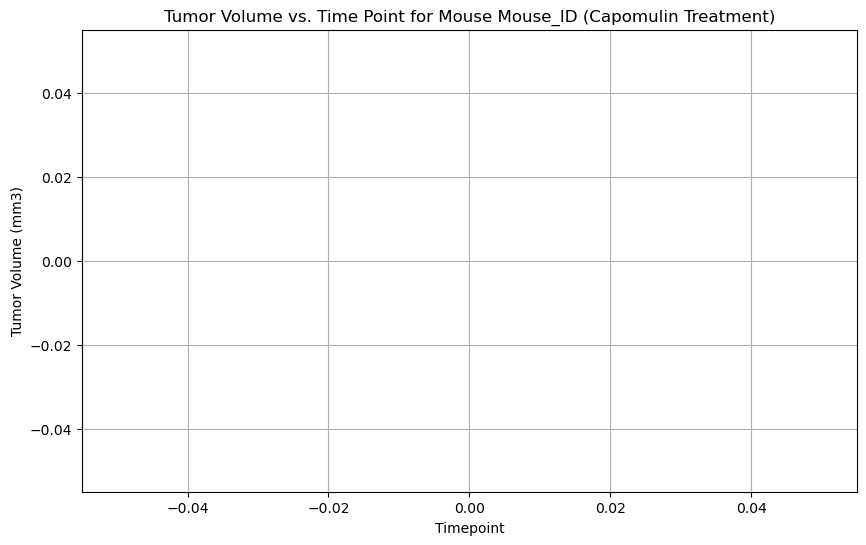

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Choose a specific mouse treated with Capomulin (replace 'Mouse_ID' with the actual Mouse ID)
selected_mouse_id = 'Mouse_ID'

# Step 2: Filter the data for the selected mouse and Capomulin treatment
selected_mouse_data = cleaned_data[(cleaned_data['Mouse ID'] == selected_mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Step 3: Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse {selected_mouse_id} (Capomulin Treatment)")

# Show the line plot
plt.grid(True)
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Step 1: Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Step 2: Group the data by Mouse ID to calculate the average observed tumor volume and mouse weight
average_tumor_volume_data = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'  # We use 'first' to get the mouse weight since it's the same for each Mouse ID
}).reset_index()

# Step 3: Create a scatter plot for mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume_data['Weight (g)'], average_tumor_volume_data['Tumor Volume (mm3)'], color='purple', alpha=0.7)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Show the scatter plot
plt.grid(True)
plt.show()
In this code:

# Step 1 filters the data to include only the Capomulin regimen.
# Step 2 groups the data by Mouse ID and calculates the average observed tumor volume and the corresponding mouse weight for each mouse.
# Step 3 creates a scatter plot with mouse weight on the x-axis and the average tumor volume on the y-axis. Customize the plot labels, title, and styling as needed.


## Correlation and Regression

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Step 1: Calculate the correlation coefficient
mouse_weight = average_tumor_volume_data['Weight (g)']
average_tumor_volume = average_tumor_volume_data['Tumor Volume (mm3)']
correlation = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]

# Step 2: Create a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Step 3: Visualize the linear regression line on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, average_tumor_volume, color='purple', alpha=0.7)
plt.plot(mouse_weight, intercept + slope * mouse_weight, color='blue', linestyle='--', label='Linear Regression')

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")

# Show the correlation coefficient on the plot
plt.text(15, 38, f"Correlation: {correlation:.2f}", fontsize=12)

# Show the linear regression equation on the plot
plt.text(15, 36, f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}", fontsize=12)

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print the correlation coefficient and linear regression statistics
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"Linear Regression:")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared Value: {r_value ** 2:.2f}")
print(f"P-Value: {p_value:.4f}")

NameError: name 'average_tumor_volume_data' is not defined